In [11]:
import csv
import numpy as np

# Read the data

In [13]:
data_temp = []
with open('./data/test_data.txt') as f:
    lines = f.readlines()
    
    for line in lines:
        val = line.split(", ")[1]
        val = val.replace(';\n','')
        val = val.split(' ')
        for i in range(len(val)):
            val[i] = float(val[i])
        val = np.asarray(val)
        data_temp.append(val)
data_temp = np.asarray(data_temp)
dataset = data_temp[300:]
print(dataset)
print(dataset.shape)

sensor_input = ['X coordinate', 'Y coordinate', 'Pressure']

[[ 0.461538  0.538462  0.      ]
 [ 0.432723  0.538462  0.003922]
 [ 0.384615  0.461538  0.031373]
 ..., 
 [ 0.769231  0.538462  0.      ]
 [ 0.769231  0.538462  0.      ]
 [ 0.769231  0.538462  0.      ]]
(3505, 3)


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

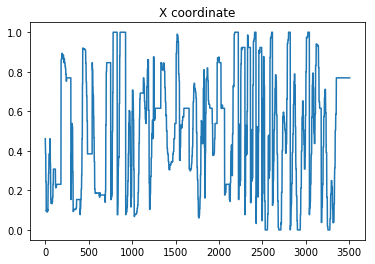

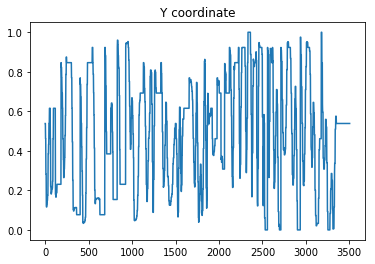

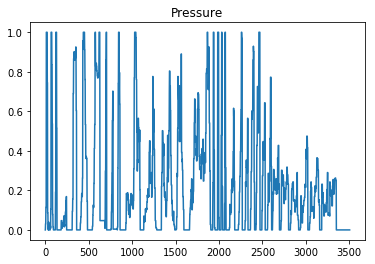

In [15]:
for i, sensor in enumerate(sensor_input):
    plt.figure()
    plt.plot(dataset[:,i])
    plt.title(sensor)

# Define Training and Test set

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [17]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2804 701


In [18]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
for i in range(50):
    print(trainX[i],trainY[i])

[[ 0.461538  0.538462  0.      ]
 [ 0.432723  0.538462  0.003922]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.094505  0.130891  1.      ]
 [ 0.096947  0.122344  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.132845  1.      ]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.103053  0.169719  0.117647]
 [ 0.097924  0.17558   0.086275]
 [ 0.097924  0.17558   0.086275]
 [ 0.097924  0.17558   0.086275]] [ 0.09792

In [20]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)
num_features = 3

(2773, 30, 3) (2773, 3)
(670, 30, 3) (670, 3)


### Prepare data for model ingestion

In [21]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_features))
testX = np.reshape(testX, (testX.shape[0], look_back, num_features))
print(trainX.shape)

(2773, 30, 3)


# Define the LSTM model

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/Users/lamtharnhantrakul/anaconda/envs/nlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(look_back, num_features)))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

NameError: name 'look_back' is not defined

### Train the model!

In [204]:
model.fit(trainX, trainY, epochs=200, batch_size=256, verbose=2)

Epoch 1/200
 - 3s - loss: 0.0953
Epoch 2/200
 - 1s - loss: 0.0758
Epoch 3/200
 - 1s - loss: 0.0631
Epoch 4/200
 - 1s - loss: 0.0503
Epoch 5/200
 - 1s - loss: 0.0407
Epoch 6/200
 - 1s - loss: 0.0351
Epoch 7/200
 - 1s - loss: 0.0307
Epoch 8/200
 - 1s - loss: 0.0269
Epoch 9/200
 - 1s - loss: 0.0239
Epoch 10/200
 - 1s - loss: 0.0215
Epoch 11/200
 - 1s - loss: 0.0187
Epoch 12/200
 - 1s - loss: 0.0159
Epoch 13/200
 - 1s - loss: 0.0142
Epoch 14/200
 - 1s - loss: 0.0127
Epoch 15/200
 - 1s - loss: 0.0121
Epoch 16/200
 - 1s - loss: 0.0119
Epoch 17/200
 - 1s - loss: 0.0108
Epoch 18/200
 - 1s - loss: 0.0105
Epoch 19/200
 - 1s - loss: 0.0104
Epoch 20/200
 - 1s - loss: 0.0106
Epoch 21/200
 - 1s - loss: 0.0099
Epoch 22/200
 - 1s - loss: 0.0094
Epoch 23/200
 - 1s - loss: 0.0091
Epoch 24/200
 - 1s - loss: 0.0091
Epoch 25/200
 - 1s - loss: 0.0088
Epoch 26/200
 - 1s - loss: 0.0086
Epoch 27/200
 - 1s - loss: 0.0084
Epoch 28/200
 - 1s - loss: 0.0083
Epoch 29/200
 - 1s - loss: 0.0083
Epoch 30/200
 - 1s - lo

In [209]:
model.save('./test_model_33.h5')

In [6]:
from keras.models import load_model
model = load_model('./models/test_model_30.h5')

import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print(trainPredict.shape, testPredict.shape)
print(trainY.shape,testY.shape)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = np.full_like(dataset, np.nan, dtype=np.double)
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict
#print(trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.full_like(dataset, np.nan, dtype=np.double)
idx_start = len(trainPredict)+(look_back*2)+1
idx_end = len(dataset)-1
print(idx_start,idx_end)
testPredictPlot[idx_start:idx_end, :] = testPredict
for i,sensor in enumerate(sensor_input):
    # plot baseline and predictions
    plt.plot(dataset[:,i])
    plt.plot(trainPredictPlot[:,i])
    plt.plot(testPredictPlot[:,i])
    plt.show()

NameError: name 'trainX' is not defined

# Load a trained model

In [23]:
from keras.models import load_model
model = load_model('./models/test_model_30.h5')

In [30]:
from pythonosc import osc_message_builder
from pythonosc import udp_client
maxClient = udp_client.UDPClient('127.0.0.1', 8000)
def sendUDPmsg(index,prediction):
    msg = osc_message_builder.OscMessageBuilder(address = '/prediction')
    msg.add_arg(int(index))
    msg.add_arg(float(prediction[0]))
    msg.add_arg(float(prediction[1]))
    msg.add_arg(float(prediction[2]))
    msg = msg.build()
    maxClient.send(msg)

In [32]:
from keras.models import load_model
import time
model = load_model('./models/test_model_30.h5')

--- 0.7785019874572754 seconds ---


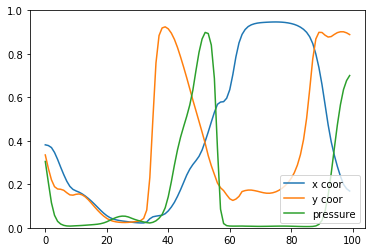

In [38]:
# pick a random seed
start = np.random.randint(0, len(trainX)-1)
pattern = trainX[start]
sequence = []
start_time = time.time()
for i in range(100):
    x = np.reshape(pattern, (1, pattern.shape[0], pattern.shape[1]))
    prediction = model.predict(x, verbose=0)
    prediction_reshaped = np.squeeze(prediction)
    sendUDPmsg(i, prediction_reshaped)
    sequence.append(prediction_reshaped)
    pattern = np.concatenate((pattern, prediction), axis=0)
    pattern = pattern[1:len(pattern),:]
sequence = np.asarray(sequence)

print("--- %s seconds ---" % (time.time() - start_time))
plt.ylim(0.0,1.0)
plt.plot(sequence[:,0], label='x coor')
plt.plot(sequence[:,1], label='y coor')
plt.plot(sequence[:,2], label='pressure')
plt.legend(loc='lower right')

In [40]:
def sendOSCMessage(address,*msgArgs):
    msg = osc_message_builder.OscMessageBuilder(address = address)
    msg.add_arg(*msgArgs) # prepend with an index for Max/MSP `coll` object
    maxClient.send(msg)

In [41]:
sendOSCMessage('/prediction',[1,0.2,0.5,0.6])

ValueError: Infered arg_value type is not supported

# Simple osc server

In [72]:
from pythonosc import dispatcher
from pythonosc import osc_server
import threading
dispatcher = dispatcher.Dispatcher()
dispatcher.map("/data", print)

server = osc_server.ThreadingOSCUDPServer(('127.0.0.1', 8007), dispatcher)
#print("Serving on {}".format(server.server_address))
server_thread = threading.Thread(target=server.serve_forever)
server_thread.daemon = True
server_thread.start()

OSError: [Errno 48] Address already in use

In [71]:
server.shutdown()

In [57]:
import socket

UDP_IP = "127.0.0.1"
UDP_PORT = 8003

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

sock.bind((UDP_IP, UDP_PORT))
for i in range(1000):
    data, addr = sock.recvfrom(1024) # buffer size is 1024 bytes
    print ("received message:", data)

received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x00>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x01>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x02>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x03>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x04>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x05>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x06>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x07>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x08>\xecN\xc5?\x1d

received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00M>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00N>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00O>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00P>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00Q>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00R>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00S>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00T>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00U>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
r

received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9a>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9b>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9c>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9d>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9e>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\x9f>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xa0>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xa1>\xecN\xc5?\x1d\x89\xd9\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xa2>\xecN\xc5?\x1d

received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xe7?8\x8b\x89?-*\xd3=\xb8\xb8\xb9'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xe8?8\x8b\x89?-*\xd3=\xb8\xb8\xb9'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xe9?B\x9c*?\t\xd8\x9e=p\xf0\xf1'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xea?>\xbb\xec>\xecN\xc5=P\xd0\xd1'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xeb?>\xbb\xec>\xecN\xc5=P\xd0\xd1'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xec>\xf4/C>\xa7\xaa{=\xc8\xc8\xc9'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xed>\xc6\xack>\xb5KU>@\xc0\xc1'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xee>\xc6\xack>\xb5KU>@\xc0\xc1'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x00\xef>\xa8j\x87>\xean\xa7>\x14\x94\x95'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x0

received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x014?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x015?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x016?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x017?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x018?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x019?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x01:?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x01;?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b'list\x00\x00\x00\x00,ifff\x00\x00\x00\x00\x00\x01<?\t\xd8\x9e>\xc4\xecO\x00\x00\x00\x00'
received message: b

KeyboardInterrupt: 

In [ ]:
sock.close()